In [152]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
#os.chdir('rev-sims')

# load in the data and prepare it for easy manipulation

In [153]:
L = 22.5
phi = 0.6
a = 0.3
z1 = np.pi*a**2/phi/L
#os.chdir('./rev-sims')
files = [f for f in os.listdir('.') if ('.npy' in f) and ('colent' not in f)]
retfiles = [f for f in files if 'rt' in f]
anafiles = [f for f in files if 'ana' in f]
retfiles = sorted(retfiles,key=lambda f: int(f.split('-')[1]))
anafiles = sorted(anafiles,key=lambda f: int(f.split('-')[1]))
ana = [np.load(f,allow_pickle=True).item() for f in anafiles]
ret = [np.load(f,allow_pickle=True) for f in retfiles]
nana = []
for a,r in zip(ana,ret):
    a['rt_cdf']=r
    nana.append(a)
data = nana
del ana,ret,retfiles,anafiles,files

kaps = np.sort(np.unique([f['kappa'] for f in data]))
params = list(set([f['parameters'] for f in data]))
q = {}
keys= ['a','g','i','l']
for k,p in zip(keys,params):
    q[k]=p
params = q
del q
colors = {'a':'magenta','g':'blue','i':'brown','l':'green'}


fata = []
for d in data:
    nu,lam,sig,mu = d['parameters']
    for k in params.keys():
        if params[k]==d['parameters']:
            flow=k
    del k 
    d['l'] = z1/np.sqrt(d['kappa'])/2
    d['flow']=flow
    d['color']=colors[flow]
    gam = nu/lam*(sig-mu)
    d['parameters']=(nu,lam,sig,mu,gam)
    d['lambda']=lam
    d['nu']=nu
    d['sig']=sig
    d['mu']=mu
    d['gam']=gam
    d['E']=nu/gam
    d['n_bar_theory']=(nu+lam)/(sig+gam-mu)
    d['n_var_theory']=(nu+lam)*(sig+gam)/(sig+gam-mu)**2
    fata.append(d)
    del nu,lam,sig,mu,gam,d
data = fata
del fata

# now data is a list of dicts-- each representing one simulation
#fata = []

In [154]:
smallsize = 8
medsize = 12
plt.rc('font', size=medsize)          # controls default text sizes
plt.rc('axes', titlesize=medsize)     # fontsize of the axes title
plt.rc('axes', labelsize=medsize)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=smallsize)    # fontsize of the tick labels
plt.rc('ytick', labelsize=smallsize)    # fontsize of the tick labels
plt.rc('legend', fontsize=smallsize)    # legend fontsize
plt.rc('figure', titlesize=medsize)  # fontsize of the figure title

# variance scaling plot

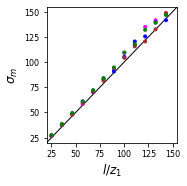

In [155]:
c=[d['color'] for d in data]
y = np.array([d['mvar'] for d in data])
x = np.array([d['l'] for d in data])
#x = np.array([d['kappa'] for d in data])
x = x/z1
y = np.sqrt(y)

plt.scatter(x,y,c=c,s=3**2,zorder=1)
fig = plt.gcf()
fig.set_size_inches(5.5/2,5.5/2)
x = np.linspace(0,160,100)
plt.plot(x,x,zorder=-1,color='black',linewidth=1)
plt.xlabel(r'$l/z_1$')
plt.ylabel(r'$\sigma_m$')
#plt.plot(x,x*np.sqrt(2),zorder=-1,color='black',linewidth=1)
plt.xlim(20,155)
plt.ylim(20,155)
ticks = np.arange(25,175,25)
plt.yticks(ticks)
plt.xticks(ticks)
plt.tight_layout()
plt.savefig('../variance.pdf',dpi=300)


# moment suppression plots

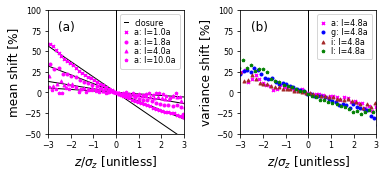

In [20]:
f, axarr = plt.subplots(1, 2,tight_layout=True)

# left subplot 
all_l =  np.unique([d['l'] for d in data])
allowed_l = [all_l[0],all_l[1],all_l[4],all_l[12]]
allowed_f = ['a']
markers = ['x','o','^','p']
i = 0 
j=0
for d in data:
    if d['flow'] in allowed_f:
        if d['l'] in allowed_l:
            #print(j)
            c = d['color']
            m,nv = d['n_bar_m']
            sigm = np.sqrt(d['mvar'])
            nbar = d['nbar']
            x = m/sigm
            y = (nv-nbar)/nbar*100
            N = 50
            n = len(x)
            dn = int(n/N)
            x = x[::dn]
            y = y[::dn]
            label=d['flow'] + ': l={}a'.format(round(d['l']/0.3,1))
            
            axarr[0].scatter(x,y,c=c,marker=markers[i],zorder=1,s=(6/2)**2,label=label)
            i+=1
                
            sig = d['sig']
            mu = d['mu']
            kap = d['kappa']
            x = np.linspace(-3,3,100)
            if i!=4:
                axarr[0].plot(x, -100*2*kap/(1-mu/sig)*x*sigm,color='black',zorder=-1,lw=1)
            else:
                axarr[0].plot(x, -100*2*kap/(1-mu/sig)*x*sigm,color='black',zorder=-1,lw=1,label='closure')

            j+=1
            #print(i)
            
            
            
            
# right top subplot
all_l =  np.unique([d['l'] for d in data])
allowed_l = [all_l[5]]
allowed_f = np.unique([d['flow'] for d in data])
#markers = ['x','o','^','p']
i = 0 
j=0
for d in data:
    if d['flow'] in allowed_f:
        if d['l'] in allowed_l:
            #print(j)
            c = d['color']
            m,nv = d['n_var_m']
            sigm = np.sqrt(d['mvar'])
            nvar = d['nvar']
            x = m/sigm
            y = (nv-nvar)/nvar*100
            N = 50
            n = len(x)
            dn = int(n/N)
            x = x[::dn]
            y = y[::dn]
            
            label=d['flow'] + ': l={}a'.format(round(d['l']/0.3,1))
            
            axarr[1].scatter(x,y,c=c,marker=markers[i],zorder=1,s=(6/2)**2,label=label)
            i+=1

            #sig = d['sig']
            #mu = d['mu']
            #kap = d['kappa']
            #x = np.linspace(-3,3,100)
            #axarr[1].plot(x, -100*2*kap/(1-mu/sig)*x*sigm,color='black',zorder=-1,lw=0.5)
            j+=1           
            #print(i)

            
axarr[0].legend(handlelength=0.5, borderpad=0.5, labelspacing=0.05)          
axarr[1].legend(handlelength=0.5, borderpad=0.5, labelspacing=0.05)          

#plt.axhline(0,color='black',zorder=-1,lw=0.5)
axarr[0].axvline(0,color='black',zorder=-1,lw=1)
axarr[1].axvline(0,color='black',zorder=-1,lw=1)

axarr[0].set_xlabel(r'$z/\sigma_z$ [unitless]')
axarr[1].set_xlabel(r'$z/\sigma_z$ [unitless]')
axarr[0].set_xlim(-3,3)
#axarr[1,0].set_xlim(-3,3)
axarr[1].set_xlim(-3,3)
#axarr[1,1].set_xlim(-3,3)

bd = 100
axarr[0].set_ylim(-50,bd)
axarr[1].set_ylim(-50,bd)

axarr[0].set_ylabel('mean shift [%]')
axarr[1].set_ylabel('variance shift [%]')
axarr[0].set_xticks(np.arange(-3,4))
axarr[1].set_xticks(np.arange(-3,4))
axarr[0].text(-3*0.85,bd*0.75,'(a)',fontsize=12)
axarr[1].text(-3*0.85,bd*0.75,'(b)',fontsize=12)


f.set_size_inches(5.52,5.52/2.1)
plt.savefig('../momentsuppression.pdf',dpi=300)

# pdf of m and n

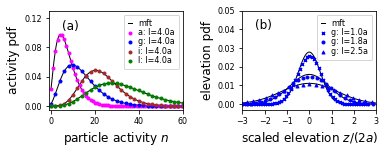

In [905]:
from scipy.special import gamma, factorial

# set up the plot
fig, (ax0,ax1) = plt.subplots(1,2)

# pdf m
markers = ['x','o','^','p']
i=0
allowed_f = ['g']
allowed_l = [all_l[0],all_l[1],all_l[2]]
for d in data:
    if d['flow'] in allowed_f:
        if d['l'] in allowed_l:
            x,y = d['m_pdf']
            x = x - d['mbar']
            x = z1*x/(0.6)
            mask = (np.abs(5*z1*x/(0.6))<3)            
            N = 41*len(x)/mask.sum()# points desired
            n = len(x[mask]) #num points
            dn = int(n/N)
            x = x[::dn]
            y = y[::dn]
            label=d['flow'] + ': l={}a'.format(round(d['l']/0.3,1))

            ax1.scatter(x,y,c=d['color'],s=3**2,marker=markers[i],zorder=1,label=label)
            i+=1
            sigm = np.sqrt(1/d['kappa']/4)
            x = np.linspace(x.min(),x.max(),200)
            if i!=3:
                ax1.plot(x,1/np.sqrt(2*np.pi)/sigm*np.exp(-(x/z1*(0.6))**2/(2*sigm**2)),zorder=-1,lw=1,color='black') 
            else:
                ax1.plot(x,1/np.sqrt(2*np.pi)/sigm*np.exp(-(x/z1*(0.6))**2/(2*sigm**2)),zorder=-1,lw=1,color='black',label='mft') 

            
ax1.legend(handlelength=0.5, borderpad=0.5, labelspacing=0.05)          
ax1.set_xlim(-3,3)
ax1.set_xticks(np.arange(-3,4))
ym1 = 0.05
ax1.set_ylim(-0.003,ym1)
ax1.set_xlabel(r'scaled elevation $z/(2a)$')
ax1.set_ylabel(r'elevation pdf')

# pdf n
i=0
allowed_f = np.unique([d['flow'] for d in data])
allowed_l = [all_l[4]]
for d in data:
    if d['flow'] in allowed_f:
        if d['l'] in allowed_l:
            x,y = d['n_pdf']
            c = d['color']
            i+=1
            dn=1
            if i>1:
                dn=2
            x = x[::dn]
            y = y[::dn]
            label=d['flow'] + ': l={}a'.format(round(d['l']/0.3,1))

            ax0.scatter(x,y,c=c,s=3**2,zorder=1,label=label)
            nu = d['nu']
            lam = d['lambda']
            sig = d['sig']
            mu = d['mu']
            gam = d['gam']
            
            r = (nu+lam)/(mu)
            p = 1-mu/(sig+gam)
            x = np.linspace(x.min(),x.max(),200)
            y = gamma(r+x)/gamma(r)/factorial(x)*p**r*(1-p)**x
            if i==4:
                ax0.plot(x,y,color='black',lw=1,zorder=-1,label='mft') 
            else:
                ax0.plot(x,y,color='black',lw=1,zorder=-1) 
ax0.set_xlim(-1,60)
ax0.set_ylim(-0.005,0.13)
ax0.set_ylabel(r'activity pdf')
ax0.set_xlabel(r'particle activity $n$')
ax0.set_yticks(np.arange(0,13,2)[::2]/100)
ax0.legend(handlelength=0.5, borderpad=0.5, labelspacing=0.05)

ax0.text(60*0.08,0.13*0.8,'(a)',fontsize=12)
ax1.text(-2.45,ym1*0.8,'(b)',fontsize=12)


w = 5.52 # width of figure in inches ', bbox_inches='tight',dpi=600)
fig.set_size_inches(5.52,5.52/2.4)
fig.tight_layout()
plt.savefig('../distributions.pdf',dpi=300)


# Return time plots 

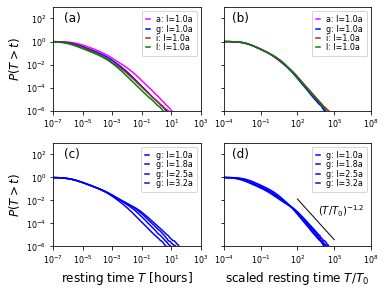

In [909]:

fig, axes = plt.subplots(2,2,sharey=True,figsize=(5.52,5.52/1.6))

# top left all flows at fixed l 
allowed_l = allowed_l = [all_l[0]]
allowed_f = np.unique([d['flow'] for d in data])
for d in data:
    if d['flow'] in allowed_f:
        if d['l'] in allowed_l:
            c = d['color']
            t,cdf = d['rt_cdf']
            t0 = d['l']/(z1*d['E'])
            #t = t/t0
            t = t/3600 # hours
            label=d['flow'] + ': l={}a'.format(round(d['l']/0.3,1))

            axes[0,0].loglog(t,cdf,color=c,label=label)
            axes[0,0].set_ylim(1e-6,1e3)
            axes[0,0].set_xlim(1e-7,1e3)
            t = np.geomspace(1e1,1e7,100)
            #axes[0,0].loglog(t,1e-2*(t/1e3)**(-1.2))
    axes[1,0].set_xlabel('resting time $T$ [hours]')
    #axes[0,0].set_xticklabels([])
axes[0,0].legend(handlelength=0.5, borderpad=0.5, labelspacing=0.05)

    
allowed_l = [all_l[0],all_l[1],all_l[2],all_l[3]]
allowed_f = ['g']
for d in data:
    if d['flow'] in allowed_f:
        if d['l'] in allowed_l:
            c = d['color']
            t,cdf = d['rt_cdf']
            t0 = d['l']/(z1*d['E'])
            #t = t/t0
            t = t/3600 # hours
            label=d['flow'] + ': l={}a'.format(round(d['l']/0.3,1))

            axes[1,0].loglog(t,cdf,color=c,label=label)
            axes[1,0].set_ylim(1e-6,1e3)
            axes[1,0].set_xlim(1e-7,1e3)
            t = np.geomspace(1e1,1e7,100)
            #axes[0,0].loglog(t,1e-2*(t/1e3)**(-1.2))
    #axes[1,0].set_xlabel('resting time $T$ [hours]')
axes[1,0].legend(handlelength=0.5, borderpad=0.5, labelspacing=0.05)
 

allowed_l = allowed_l = [all_l[0]]
allowed_f = np.unique([d['flow'] for d in data])
for d in data:
    if d['flow'] in allowed_f:
        if d['l'] in allowed_l:
            c = d['color']
            t,cdf = d['rt_cdf']
            t0 = d['l']/(z1*d['E'])
            t = t/t0
            #t = t/3600 # hours
            label=d['flow'] + ': l={}a'.format(round(d['l']/0.3,1))

            axes[0,1].loglog(t,cdf,color=c,label=label)
            axes[0,1].set_ylim(1e-6,1e3)
            axes[0,1].set_xlim(1e-4,1e8)
            t = np.geomspace(1e1,1e7,100)
            #axes[0,0].loglog(t,1e-2*(t/1e3)**(-1.2))
    axes[1,1].set_xlabel('scaled resting time $T/T_0$')
axes[0,1].legend(handlelength=0.5, borderpad=0.5, labelspacing=0.05)
   
    
    
allowed_l = [all_l[0],all_l[1],all_l[2],all_l[3]]
allowed_f = ['g']
for d in data:
    if d['flow'] in allowed_f:
        if d['l'] in allowed_l:
            c = d['color']
            t,cdf = d['rt_cdf']
            t0 = d['l']/(z1*d['E'])
            #t0 = np.sqrt(d['mvar'])/d['E']
            t = t/t0
            #t = t/3600 # hours
            label=d['flow'] + ': l={}a'.format(round(d['l']/0.3,1))
            
            axes[1,1].loglog(t,cdf,color=c,label=label)
            axes[1,1].set_ylim(1e-6,1e3)
            axes[1,1].set_xlim(1e-4,1e8)
            t = np.geomspace(1e1,1e7,100)
            #axes[0,0].loglog(t,1e-2*(t/1e3)**(-1.2))
axes[0,0].set_ylabel(r'$P(T>t)$')
axes[1,0].set_ylabel('$P(T>t)$')
axes[1,1].legend(handlelength=0.5, borderpad=0.5, labelspacing=0.05)

# now draw on the -1 line
t = np.geomspace(1e2,1e5)
axes[1,1].loglog(t,2e-3*(t/5e2)**(-1.18),color='black',lw=1)

# now add abcd
a = '(a)'
b = '(b)'
c = '(c)'
d = '(d)'
axes[0,0].text(5e-7,5e1,a)
axes[1,0].text(5e-7,5e1,c)
axes[0,1].text(5e-4,5e1,b)
axes[1,1].text(5e-4,5e1,d)

# add in scaling
axes[1,1].text(5e3,5e-4,r'$(T/T_0)^{-1.2}$',fontsize=10)
fig.set_size_inches(5.52,5.52/1.3)
fig.tight_layout()
plt.savefig('../rtcdf.pdf',dpi=300)


# Collective entrainment effects

## load the data

In [251]:
L = 22.5
phi = 0.6
a = 0.3
z1 = np.pi*a**2/phi/L
#os.chdir('./rev-sims')
files = [f for f in os.listdir('.') if ('.npy' in f) and ('colent' in f)]
retfiles = [f for f in files if 'rt' in f]
anafiles = [f for f in files if 'ana' in f]
retfiles = sorted(retfiles,key=lambda f: int(f.split('-')[2]))
anafiles = sorted(anafiles,key=lambda f: int(f.split('-')[2]))
ana = [np.load(f,allow_pickle=True).item() for f in anafiles]
ret = [np.load(f,allow_pickle=True) for f in retfiles]
nana = []
for a,r in zip(ana,ret):
    a['rt_cdf']=r
    nana.append(a)
data = nana
del ana,ret,retfiles,anafiles,files

kaps = np.sort(np.unique([f['kappa'] for f in data]))
params = list(set([f['parameters'] for f in data]))
q = {}
keys= ['a','g','i','l']
for k,p in zip(keys,params):
    q[k]=p
params = q
del q
colors = {'a':'magenta','g':'blue','i':'brown','l':'green'}


fata = []
for d in data:
    nu,lam,sig,mu = d['parameters']
    for k in params.keys():
        if params[k]==d['parameters']:
            flow=k
    del k 
    d['l'] = z1/np.sqrt(d['kappa'])/2
    d['flow']=flow
    d['color']=colors[flow]
    gam = nu/lam*(sig-mu)
    d['parameters']=(nu,lam,sig,mu,gam)
    d['lambda']=lam
    d['nu']=nu
    d['sig']=sig
    d['mu']=mu
    d['gam']=gam
    d['E']=nu/gam
    d['n_bar_theory']=(nu+lam)/(sig+gam-mu)
    d['n_var_theory']=(nu+lam)*(sig+gam)/(sig+gam-mu)**2
    fata.append(d)
    del nu,lam,sig,mu,gam,d
data = fata
del fata

# now data is a list of dicts-- each representing one simulation
#fata = []

## now study the mean suppression effect with f 

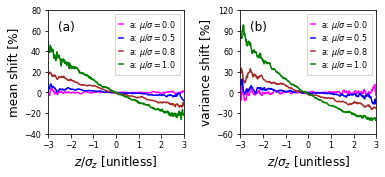

In [896]:
col = colors.values()
pltdata = [data[i] for i in [0,3,5,7]]
fig, (ax0,ax1) = plt.subplots(1,2)


for c,d in zip(col,pltdata):
    m,nbm = d['n_bar_m']
    msig = np.sqrt(d['mvar'])
    m=m/msig
    nbar = d['nbar']
    f = str(round(d['mu']/d['sig'],1))
    label = 'a: '+r'$\mu/\sigma=$'+f
    nbm = (nbm-nbar)/nbar*100
    ax0.plot(m,nbm,label=label,color=c)
    
    
for c,d in zip(col,pltdata):
    m,nbm = d['n_var_m']
    msig = np.sqrt(d['mvar'])
    m=m/msig
    nvar = d['nvar']
    f = str(round(d['mu']/d['sig'],1))
    label = 'a: '+r'$\mu/\sigma=$'+f
    nbm = (nbm-nvar)/nvar*100
    ax1.plot(m,nbm,label=label,color=c)    
    
    #plt.plot(m,-2*msig*m*d['kappa']/(1-d['mu']/d['sig']),color='black')
ax0.legend(handlelength=0.5, borderpad=0.5, labelspacing=0.05,fontsize=8)
ax0.set_xlim(-3,3)
#bd = 100
ax0.set_ylim(-40,80)
ax0.text(-3*0.85,80*0.75,'(a)',fontsize=12)
ax0.set_xlabel(r'$z/\sigma_z$ [unitless]')
ax0.set_xticks(np.arange(-3,4))
ax0.set_yticks(np.arange(-40,100,20))
ax0.set_ylabel('mean shift [%]')

fig.set_size_inches(5.52,5.52/2.1)


ax1.set_xlim(-3,3)
ax1.set_xlabel(r'$z/\sigma_z$ [unitless]')
ax1.set_xticks(np.arange(-3,4))
ax1.set_ylim(-60,120)
ax1.legend(handlelength=0.5, borderpad=0.5, labelspacing=0.05,fontsize=8)
ax1.set_ylabel('variance shift [%]')
ax1.text(-3*0.85,120*0.75,'(b)',fontsize=12)
ax1.set_yticks(np.arange(-60,140,30))

fig.set_size_inches(5.52,5.52/2.1)
fig.tight_layout()
plt.savefig('../colent-suppression.pdf',dpi=300)